In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from IPython.display import Markdown as md

# get working directory, where the runs and routines should be stored
dir0 = os.getcwd() + '/'
HOME = dir0 + '/..'

os.chdir(HOME)
import plot_sets
import interferometry as inte
import interferometry_plots as in_pl
os.chdir(dir0)

###
### Author: Alberto Roper Pol
### created: 31/05/2022, based on functions from JCAP_2107_05356 project
###

### 

In this notebook, we study the sensitivity of LISA and Taiji to SGWB by computing the sensitivities and power law sensitivities using the routines in interferometry.py. The response functions have been previously studied and can be computed using the notebook **response_functions.ipynb**

Here, we will directly read the response functions from stored files under *HOME/detector_sensitivity*

We follow the description found in the appendix B of A. Roper Pol, S. Mandal, A. Brandenburg, and T. Kahniashvili, *"Polarization of gravitational waves from helical MHD turbulent sources,"* JCAP 04 (2022) 019, [arxiv:2107/05356](https://arxiv.org/abs/2107.05356).

In [2]:
print('DESCRIPTION: \n', inte.__doc__)
#print('DESCRIPTION: \n', in_pl.__doc__)

#### To see all the available functions in interferometry.py and their description
#### uncomment the following line
#print(help(inte))

DESCRIPTION: 
 
interferometry.py is a Python routine that computes the response and
sensitivity functions of interferometer space-based GW detectors, e.g., LISA and Taiji,
to the detection of SGWB (see tutorial on interferometry/interferometry.ipynb).

Author: Alberto Roper Pol
Created: 01/05/2022
Updated: 31/05/2023 for new release of cosmoGW, included tutorial

Main reference: A. Roper Pol, S. Mandal, A. Brandenburg, T. Kahniashvili,
"Polarization of gravitational waves from helical MHD turbulent sources,"
JCAP 04 (2022), 019, arXiv:2107.05356, appendix B



In [3]:
# After the response functions for LISA and Taiji have been computed
# and are available under 'detector_senstivity', one can generate the strain
# sensitivities for LISA and Taiji

# we can obtain the strain sensitivities for different channels and for LISA and Taiji
fs, SnA, SnT = inte.Sn_f(interf='LISA', TDI=True)
fsX, SnX, SnXY = inte.Sn_f(interf='LISA', TDI=False)
fs_Tai, SnC, SnS = inte.Sn_f(interf='Taiji', TDI=True)
fsX_Tai, SnX_Tai, SnXY_Tai = inte.Sn_f(interf='Taiji', TDI=False)
fs_EI, Sn_EI, _ = inte.Sn_f(interf='comb', TDI=True, M='MED', Xi=False)

print('The function used to compute the strain sensitivities is interferometry.Sn_f')
print('\n interferometry.Sn_f \n', inte.Sn_f.__doc__)

The function used to compute the strain sensitivities is interferometry.Sn_f

 interferometry.Sn_f 
 
    Function that computes the strain sensitivity using the analytical fit
    for an interferometer channel X.

    Arguments:
        interf -- option to chose the interferometer (default 'LISA', other
                  option availables are 'Taiji' and 'comb', referring to cross-correlated
                  channels of LISA and Taiji)
        TDI -- option to read the response functions for TDI chanels, instead of XYZ
               chanels (default True)
        M -- selection of cross-correlated channels (only when interf='comb', default 'MED')
        V -- selection of Stokes parameter (default intensity I)
        Xi -- option to compute strain sensitivity to polarized GW backgrounds from the
              anisotropies induced due to the Solar System proper motion (default False)

    Returns:
        fs -- frequency array
        SnA -- strain sensitivity in the channel A (if T


    Function that generates the plot of LISA and Taiji strain sensitivities \sqrt{S_h(f)}

    Arguments:
        save -- option to save the figure in "plots/sensitivity_LISA_Taiji.pdf"
                (default True)
                
    Reference: A. Roper Pol, S. Mandal, A. Brandenburg, T. Kahniashvili,
    "Polarization of gravitational waves from helical MHD turbulent sources,"
    JCAP 04 (2022), 019, arXiv:2107.05356, appendix B
    
    The resulting sensitivity \sqrt{S_h} is validated to be the same for the LISA
    X channel as that of C. Caprini, D. Figueroa, R. Flauger, G. Nardini, M. Peloso,
    M. Pieroni, A. Ricciardone, G. Tasinato, "Reconstructing the spectral shape of a
    stochastic gravitational wave background with LISA," JCAP 11 (2019), 017,
    arXiv:1906.09244, Fig. 1.
    


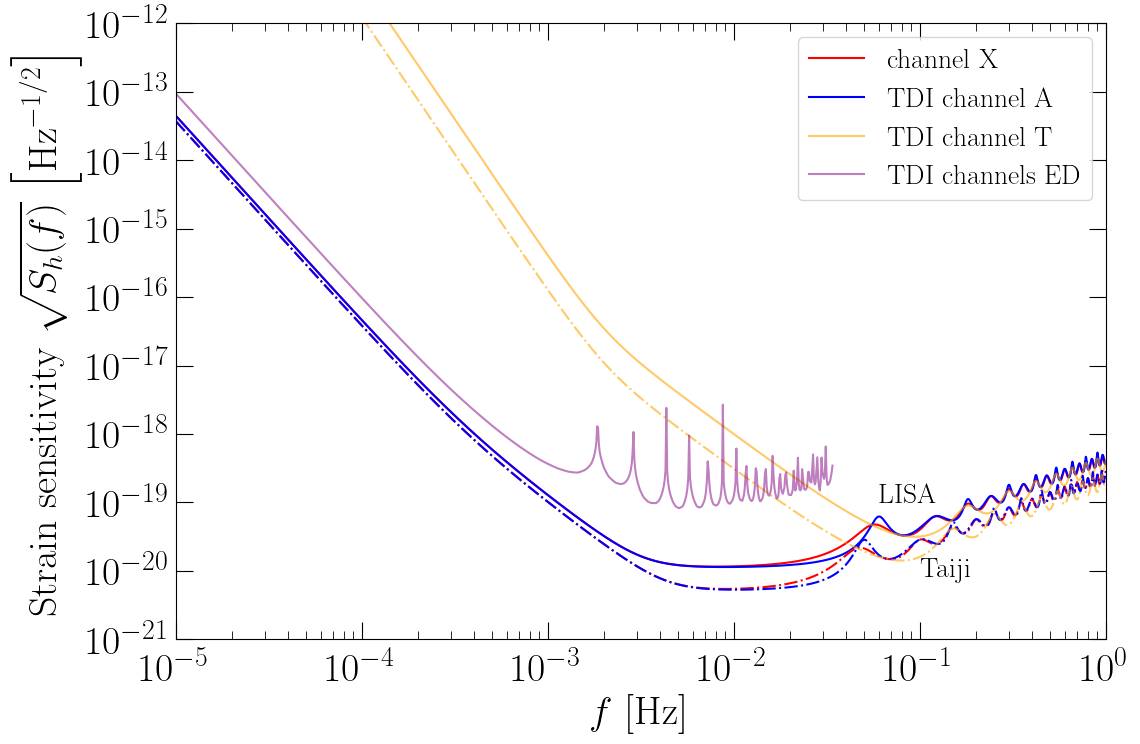

In [4]:
print(in_pl.plot_sensitivity.__doc__)
in_pl.plot_sensitivity(save=True)

In [5]:
### From the strain sensitivities, we can compute the sensitivity to Omega (GW energy density ratio)
### of LISA and Taiji

## GW energy density sensitivity Omega_s for LISA and Taiji
fs, OmSA, OmST = inte.compute_Oms_LISA_Taiji(interf='LISA', TDI=True, h0=1.)
fsX, OmSX, _ = inte.compute_Oms_LISA_Taiji(interf='LISA', TDI=False, h0=1.)
fs, OmSC, OmSS = inte.compute_Oms_LISA_Taiji(interf='Taiji', TDI=True, h0=1.)
OmS_comb = inte.Oms(fs, SnA, h0=1., comb=True, S2=SnC, Xi=False)
OmS_ED = inte.Oms(fs_EI, abs(Sn_EI), h0=1.)

print('The functions used to compute the Omega sensitivities are interferometry.compute_Oms_LISA_Taiji',
      ' and interferometry.Oms')

print('\n interferometry.compute_Oms_LISA_Taiji \n', inte.compute_Oms_LISA_Taiji.__doc__)

print('\n interferometry.Oms \n', inte.Oms.__doc__)

The functions used to compute the Omega sensitivities are interferometry.compute_Oms_LISA_Taiji  and interferometry.Oms

 interferometry.compute_Oms_LISA_Taiji 
 
    Function that reads the response functions for LISA and/or Taiji, computes the strain
    sensitivities and from those, the sensitivity to the GW energy density spectrum \Omega_s
    
    Arguments:
         interf -- option to chose the interferometer (default 'LISA', other
                  option availables are 'Taiji' and 'comb', referring to cross-correlated
                  channels of LISA and Taiji)
         TDI -- option to read the response functions for TDI chanels, instead of XYZ
                chanels (default True)
    

 interferometry.Oms 
 
    Function that returns the sensitivity Sh(f) in terms of the GW energy density Om(f)

    Arguments:
        f -- frequency array (should be in units of Hz)
        S -- strain sensitivity function
        h0 -- parameterizes the uncertainties (Hubble tension) on 

In [6]:
### The Omega sensitiviy of LISA for channel A is commonly used elsewhere, so we save it within
### the 'detector_sensitivity' directory

import pandas as pd

df = pd.DataFrame({'f': fs, 'Omega': OmSA})
df.to_csv(HOME + '/detector_sensitivity/LISA_Omega.csv')

In [7]:
### We can now compute the PLS for a threshold signal-to-noise ratio (SNR) and duration T

# The reference PLSs use SNR = 1, T = 1
OmPLS_A = inte.OmPLS(OmSA, f=fs)
OmPLS_X = inte.OmPLS(OmSX, f=fsX)

### Since this is used within cosmoGW we can also save the PLS for LISA's channel A
df = pd.DataFrame({'f': fs, 'Omega': OmPLS_A})
df.to_csv(HOME + '/detector_sensitivity/LISA_OmegaPLS.csv')


    Function that generates the plot of LISA and Taiji GW energy density
    sensitivities and PLS.

    It corresponds to left panel of figure 16 of A. Roper Pol, S. Mandal,
    A. Brandenburg, and T. Kahniashvili, "Polarization of gravitational waves
    from helical MHD turbulent sources," JCAP 04 (2022) 019,
    https://arxiv.org/abs/2107.05356.

    Arguments:
        OmPLS -- power law sensitivity (PLS) of LISA for T = 1yr and SNR = 1
        OmPLS_Tai -- power law sensitivity (PLS) of Taiji for T = 1yr
                     and SNR = 1
        OmPLS_comb -- power law sensitivity (PLS) of the LISA-Taiji network
                      for T = 1yr and SNR = 1
        SNR -- signal-to-noise ratio (SNR) for the plotted PLS (default 10)
        T -- duration of the observations for the plotted PLS in
             years (default 4)
        save -- option to save the figure in "plots/Omega_LISA_Taiji.pdf"
                (default True)
    


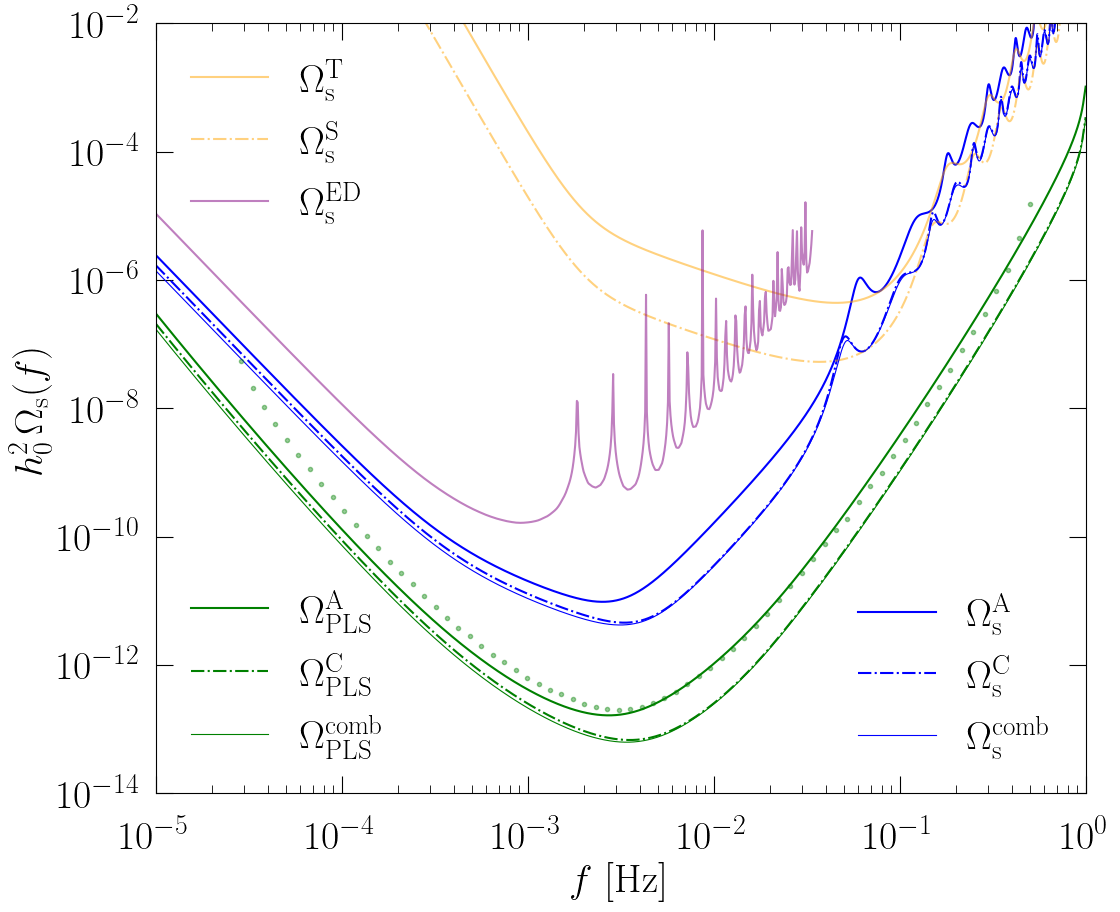

In [8]:
print(in_pl.plot_Omega_sensitivity.__doc__)
in_pl.plot_Omega_sensitivity(SNR=10, T=4, save=True, h0=1.)

In [4]:
import numpy as np
beta = np.linspace(-20, 20, 3000)
fs, OmPLS, OmPLS_Tai, OmPLS_comb = gen.get_Omega_PLS(beta)

NameError: name 'gen' is not defined


    Function that generates the plot of LISA and Taiji GW energy density
    sensitivities and PLS.

    It corresponds to left panel of figure 16 of A. Roper Pol, S. Mandal,
    A. Brandenburg, and T. Kahniashvili, "Polarization of gravitational waves
    from helical MHD turbulent sources," submitted to JCAP,
    https://arxiv.org/abs/2107.05356.

    Arguments:
        OmPLS -- power law sensitivity (PLS) of LISA for T = 1yr and SNR = 1
        OmPLS_Tai -- power law sensitivity (PLS) of Taiji for T = 1yr
                     and SNR = 1
        OmPLS_comb -- power law sensitivity (PLS) of the LISA-Taiji network
                      for T = 1yr and SNR = 1
        SNR -- signal-to-noise ratio (SNR) for the plotted PLS (default 10)
        T -- duration of the observations for the plotted PLS in
             years (default 4)
        save -- option to save the figure in "plots/Omega_LISA_Taiji.pdf"
                (default True)
    


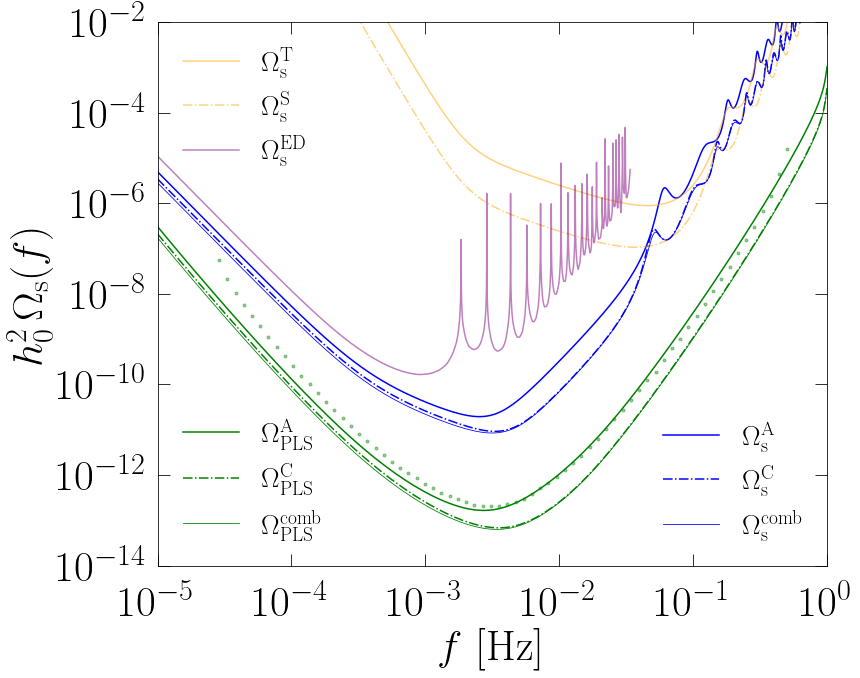

In [7]:
print(gen.plot_Omega_sensitivity.__doc__)
gen.plot_Omega_sensitivity(OmPLS, OmPLS_Tai, OmPLS_comb, SNR=10, T=4, save=True)

In [8]:
import numpy as np
beta = np.linspace(-20, 2, 3000)
fs, XiPLSa, XiPLSa_Tai = gen.get_Xi_PLS_dip(beta)
beta = np.linspace(-20, 3, 3000)
fs, XiPLSb, XiPLSb_Tai = gen.get_Xi_PLS_dip(beta)
beta = np.linspace(-20, 20, 3000)
fs, XiPLS_comb = gen.get_Xi_PLS(beta)


    Function that generates the plot of LISA and Taiji GW energy density
    polarization sensitivities and PLS.

    It corresponds to right panel of figure 16 of A. Roper Pol, S. Mandal,
    A. Brandenburg, and T. Kahniashvili, "Polarization of gravitational waves
    from helical MHD turbulent sources," submitted to JCAP,
    https://arxiv.org/abs/2107.05356.

    Arguments:
        XiPLSa -- polarization PLS of the dipole response function of LISA
                  with beta_max = 2 for T = 1yr and SNR = 1
        XiPLSb -- polarization PLS of the dipole response function of LISA
                  with beta_max = 3 for T = 1yr and SNR = 1
        XiPLSa_Tai -- polarization PLS of the dipole response function of Taiji
                      with beta_max = 2 for T = 1yr and SNR = 1
        XiPLSb_Tai -- polarization PLS of the dipole response function of Taiji
                      with beta_max = 3 for T = 1yr and SNR = 1
        XiPLS_comb -- polarization PLS of the LISA-Taiji net

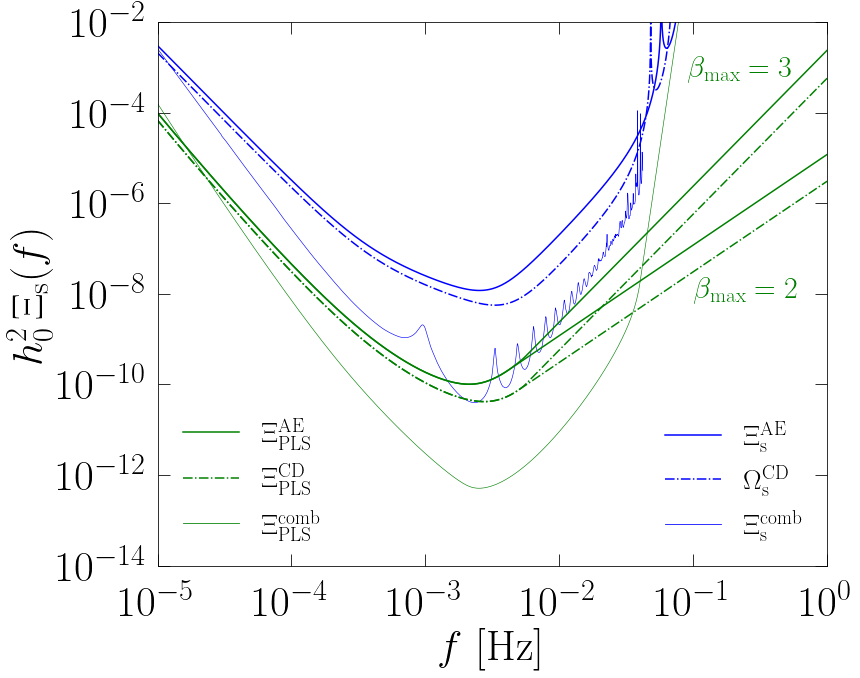

In [9]:
print(gen.plot_Xi_sensitivity.__doc__)
gen.plot_Xi_sensitivity(XiPLSa, XiPLSb, XiPLSa_Tai, XiPLSb_Tai, XiPLS_comb, save=True)

In [10]:
import numpy as np
beta = np.linspace(-20, 3.7, 3000)
fs, XiPLSc, XiPLSc_Tai = gen.get_Xi_PLS_dip(beta)
beta = np.linspace(-20, 3.95, 3000)
fs, XiPLSd, XiPLSd_Tai = gen.get_Xi_PLS_dip(beta)
beta = np.linspace(-20, 3.999, 3000)
fs, XiPLSe, XiPLSe_Tai = gen.get_Xi_PLS_dip(beta)
beta = np.linspace(-20, 3.999999, 3000)
fs, XiPLSf, XiPLSf_Tai = gen.get_Xi_PLS_dip(beta)
beta = np.linspace(-20, 20, 3000)
fs, XiPLS0, XiPLS0_Tai = gen.get_Xi_PLS_dip(beta, Xi=0)

In [11]:
beta = np.append(np.linspace(-20, 0, 2000),
                 np.linspace(5, 20, 1000))
fs, XiPLSg, XiPLSg_Tai = gen.get_Xi_PLS_dip(beta)
beta = np.append(np.linspace(-20, 3, 2000),
                 np.linspace(4.2, 20, 1000))
fs, XiPLSh, XiPLSh_Tai = gen.get_Xi_PLS_dip(beta)


    Function that generates the plot of the GW energy density
    polarization PLS for different values of beta_max.

    It corresponds to figure 17 of A. Roper Pol, S. Mandal,
    A. Brandenburg, and T. Kahniashvili, "Polarization of gravitational waves
    from helical MHD turbulent sources," submitted to JCAP,
    https://arxiv.org/abs/2107.05356.

    Arguments:
        XiPLSa -- polarization PLS of the dipole response function of LISA
                  with beta_max = 2 for T = 1yr and SNR = 1
        XiPLSb -- polarization PLS of the dipole response function of LISA
                  with beta_max = 3 for T = 1yr and SNR = 1
        XiPLSc -- polarization PLS of the dipole response function of LISA
                  with beta_max = 3.7 for T = 1yr and SNR = 1
        XiPLSd -- polarization PLS of the dipole response function of LISA
                  with beta_max = 3.95 for T = 1yr and SNR = 1
        XiPLSe -- polarization PLS of the dipole response function of LISA
         

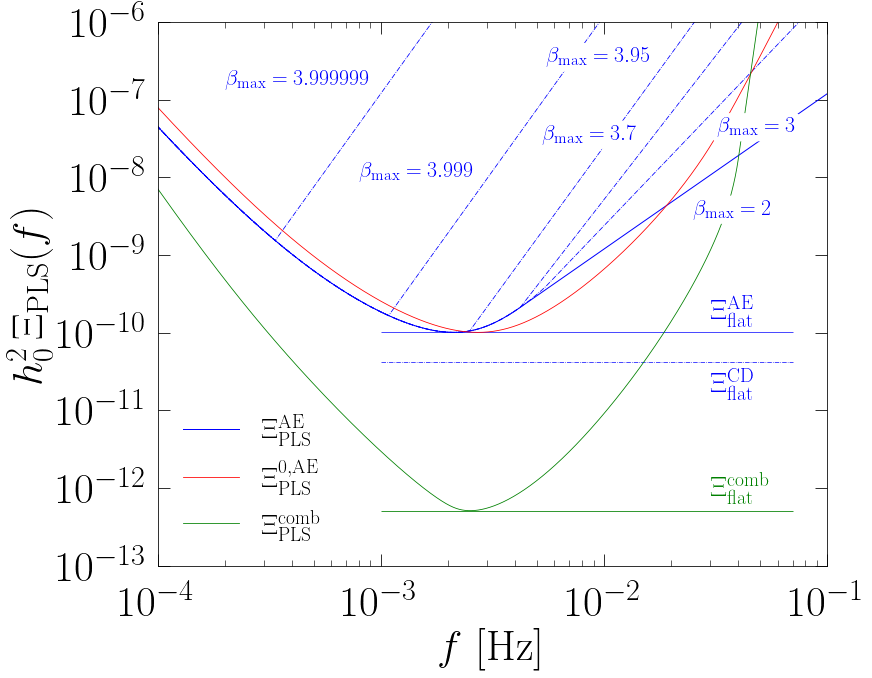

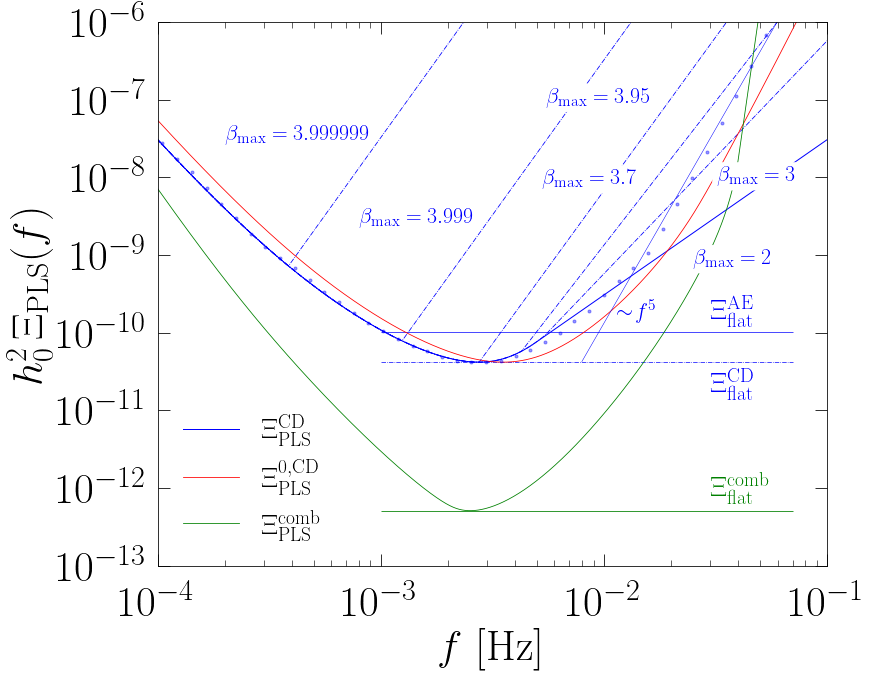

In [12]:
print(gen.plot_Xi_sensitivity_dipole.__doc__)

gen.plot_Xi_sensitivity_dipole(XiPLSa, XiPLSb, XiPLSc, XiPLSd,
                               XiPLSe, XiPLSf, XiPLSg, XiPLS0, XiPLS_comb, save=True)

gen.plot_Xi_sensitivity_dipole(XiPLSa_Tai, XiPLSb_Tai, XiPLSc_Tai, XiPLSd_Tai,
                               XiPLSe_Tai, XiPLSf_Tai, XiPLSg_Tai, XiPLS0_Tai, XiPLS_comb, interf='Taiji',
                               save=True)


    Function that generates the plot of the helical (V Stokes parameter)
    monopole responses of the cross-correlated channels of the LISA-Taiji
    network.

    It corresponds to figure 18 of A. Roper Pol, S. Mandal,
    A. Brandenburg, and T. Kahniashvili, "Polarization of gravitational waves
    from helical MHD turbulent sources," submitted to JCAP,
    https://arxiv.org/abs/2107.05356.

    Arguments:
        save -- option to save the figure in
                "plots/Mcross_LISA_Taiji.pdf" (default True)
        log -- option to plot loglog with absolute values of the response
               functions (default False)
    


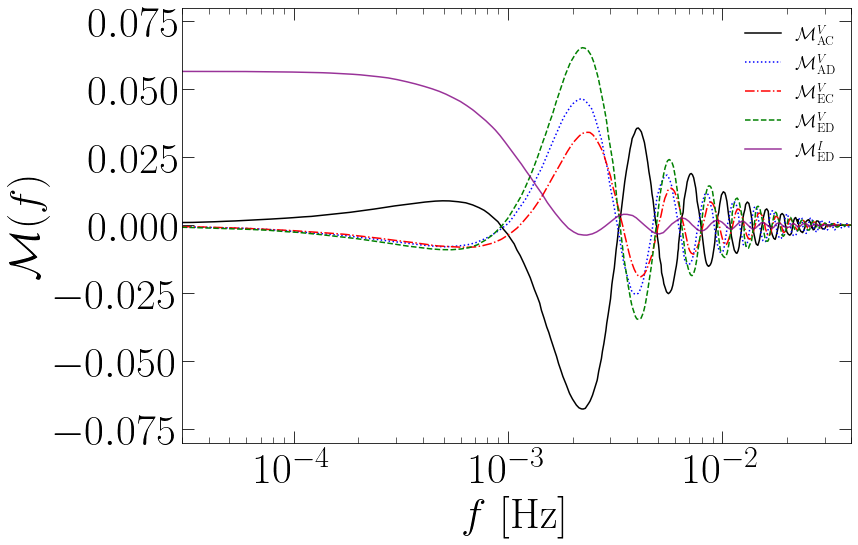

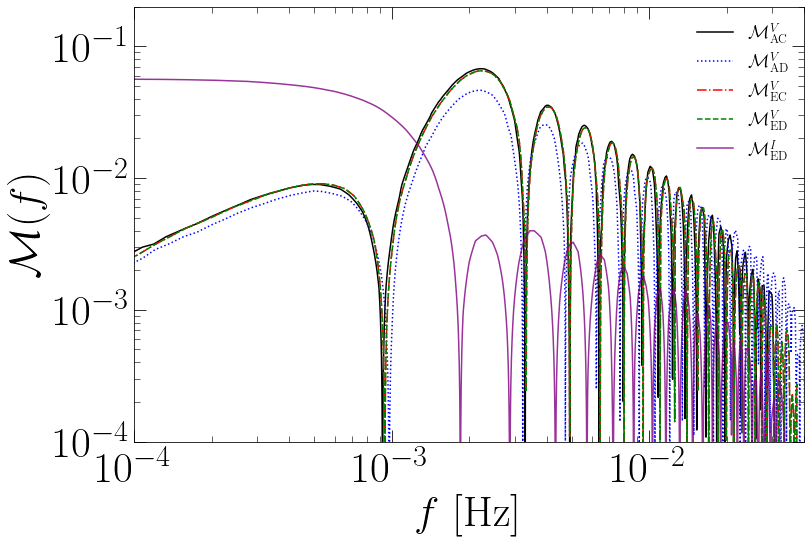

In [13]:
print(gen.plot_MAC.__doc__)
gen.plot_MAC(save=True)
gen.plot_MAC(save=True, log=True)


    Function that generates the plot of LISA and Taiji strain sensitivities.

    Arguments:
        save -- option to save the figure in "plots/sensitivity_LISA_Taiji.pdf"
                (default True)
    


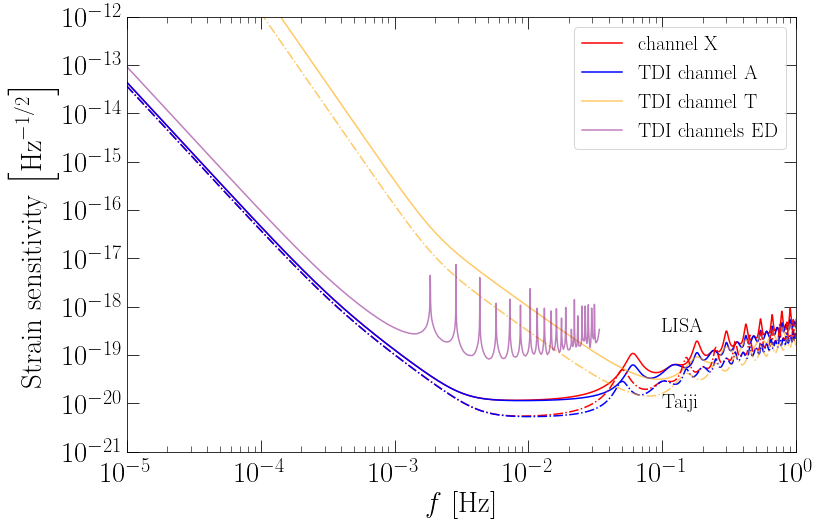

In [14]:
print(gen.plot_sensitivity.__doc__)
gen.plot_sensitivity(save=True)


    Function that generates the plot of the GW energy density
    polarization sensitivity obtained by combining the cross-correlated
    channels of the LISA-Taiji network.

    Arguments:
        save -- option to save the figure in "plots/Xi_LISA_Taiji_comb.pdf"
                (default True)
    


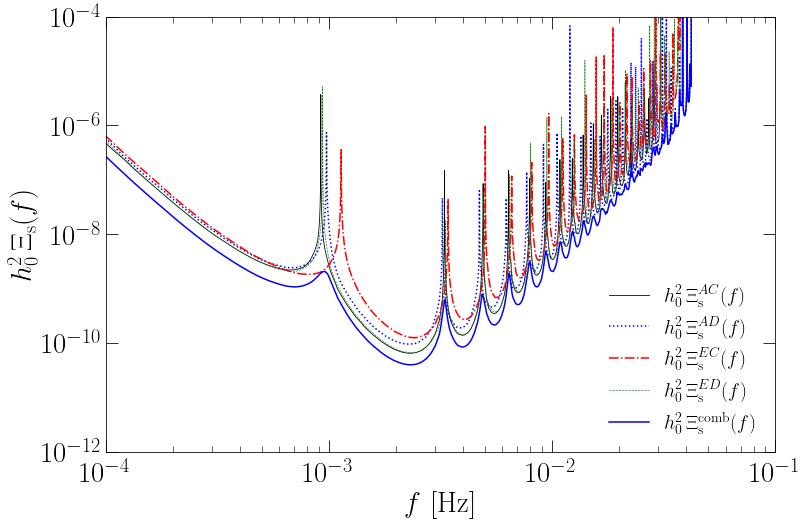

In [15]:
print(gen.plot_Xi_sensitivity_comb.__doc__)
gen.plot_Xi_sensitivity_comb(save=True)